# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Create Output Path
output_file_path=os.path.join("output data")

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather" 
 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url)
        city_weather = response.json()
        if city_weather["cod"] != 200:
            print(f"City not found. Skipping... Error:{city_weather['message']}")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sorong
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mafinga
Processing Record 5 of Set 1 | vilhena
Processing Record 6 of Set 1 | al hawatah
Processing Record 7 of Set 1 | novaya tavolzhanka
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | paphos
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | la'ie
Processing Record 14 of Set 1 | ulladulla
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | arak
Processing Record 17 of Set 1 | trincomalee
Processing Record 18 of Set 1 | san jose
Processing Record 19 of Set 1 | moussoro
Processing Record 20 of Set 1 | illizi
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | vorgashor
Processing Record 23 of Set 1 | el sauz

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sorong,-0.8833,131.2500,26.73,83,100,3.15,ID,1742427448
1,kruisfontein,-34.0033,24.7314,23.33,38,0,2.33,ZA,1742427449
2,ushuaia,-54.8000,-68.3000,7.81,76,75,12.86,AR,1742427373
3,mafinga,-7.2500,35.0667,17.97,95,83,0.97,TZ,1742427452
4,vilhena,-12.7406,-60.1458,22.12,100,75,4.12,BR,1742427453


In [40]:
# Export the City_Data into a csv
os.makedirs(output_file_path, exist_ok=True)
city_data_df.to_csv(os.path.join(output_file_path,"cities.csv"), index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output data//cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorong,-0.8833,131.2500,26.73,83,100,3.15,ID,1742427448
1,kruisfontein,-34.0033,24.7314,23.33,38,0,2.33,ZA,1742427449
2,ushuaia,-54.8000,-68.3000,7.81,76,75,12.86,AR,1742427373
3,mafinga,-7.2500,35.0667,17.97,95,83,0.97,TZ,1742427452
4,vilhena,-12.7406,-60.1458,22.12,100,75,4.12,BR,1742427453


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

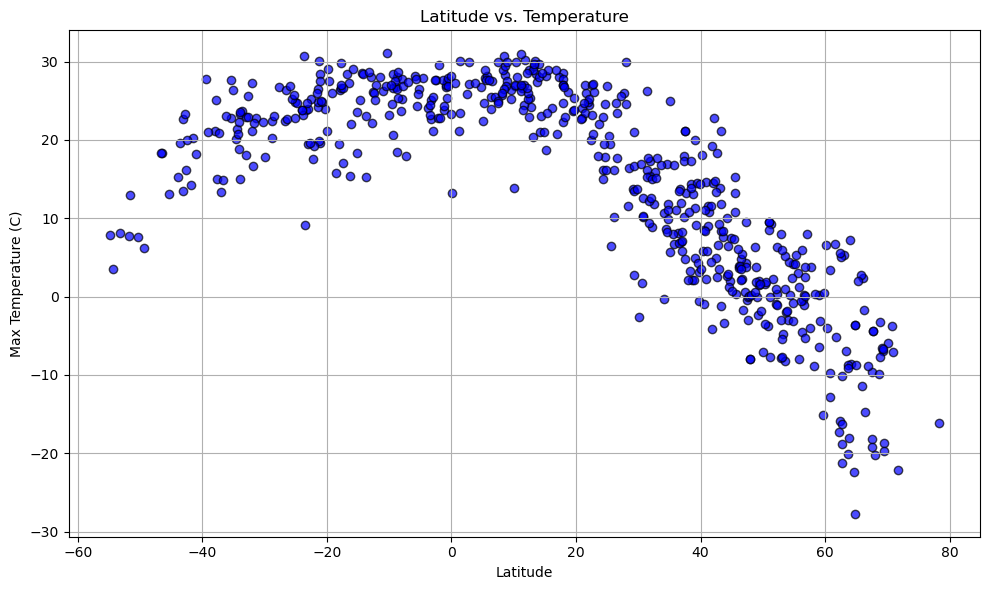

In [52]:
fig_1_output=os.path.join(output_file_path, "fig_1.png")
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig(fig_1_output)

# Show plot
plt.show()

#### Latitude Vs. Humidity

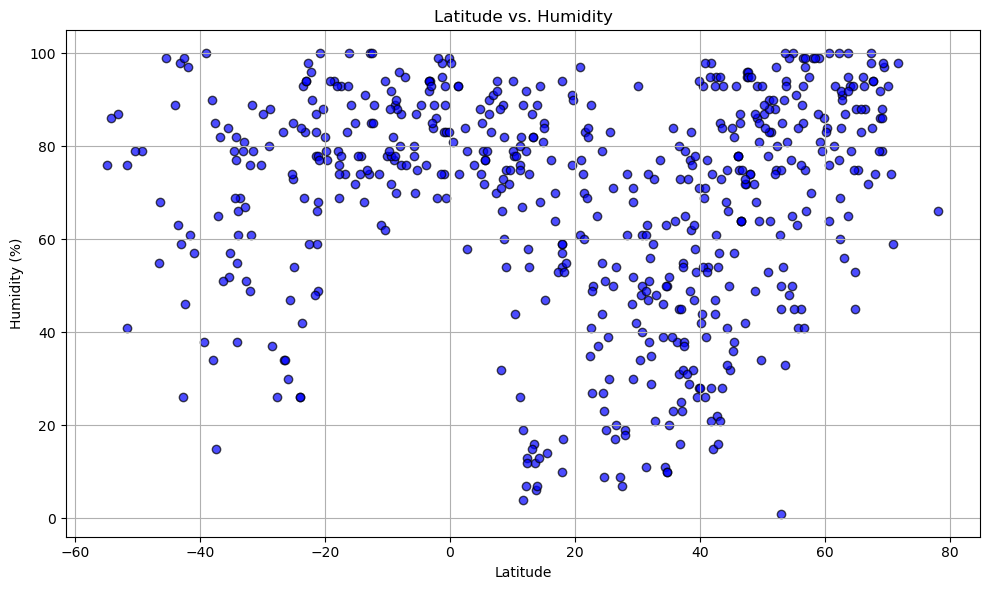

In [55]:
fig_2_output=os.path.join(output_file_path, "Fig_2.png")
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig(fig_2_output)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

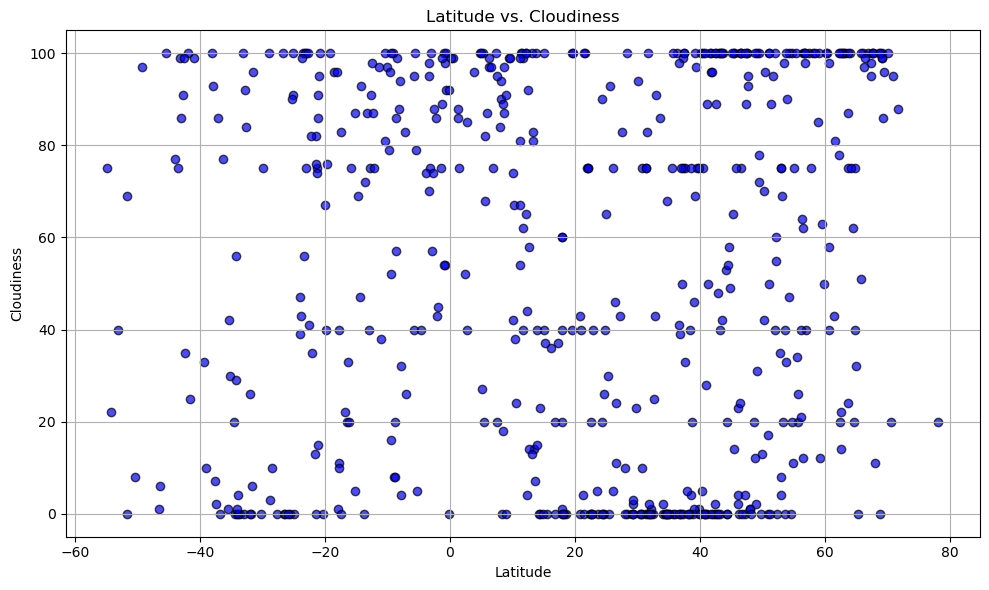

In [56]:
fig_3_output=os.path.join(output_file_path,  "Fig_3.png")
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig(fig_3_output)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

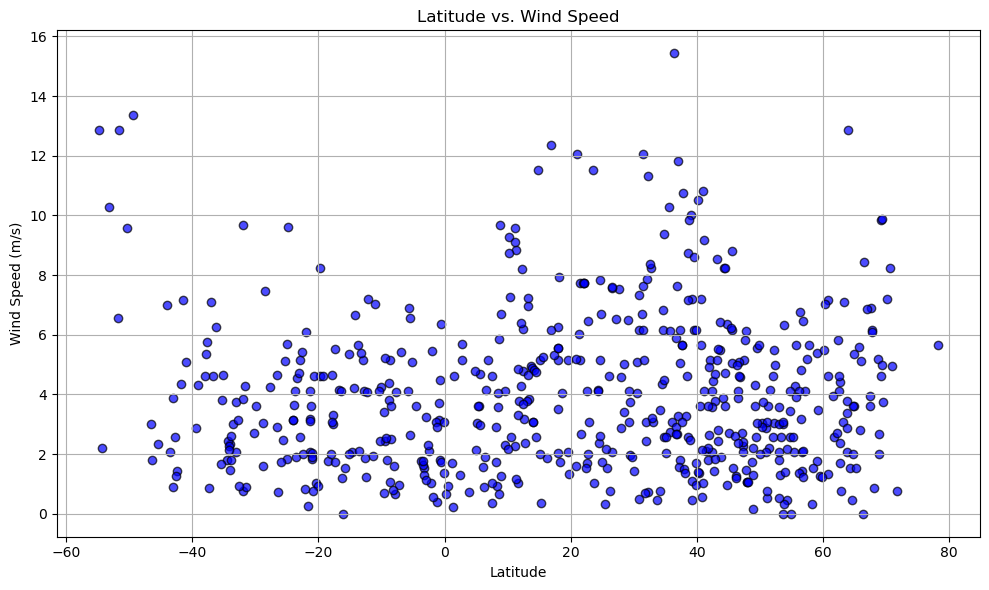

In [57]:
fig_4_output=os.path.join(output_file_path, "Fig_4.png")
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig(fig_4_output)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, xlabel, ylabel, figure_name, fig_size=(10, 6)):
    slope, intercept, r_value, p_value, std_err= linregress(x, y)
    regress_line= x* slope + intercept
    plt.scatter(x,y, color="b", edgecolor="black", alpha=0.7)
    plt.plot(x, regress_line,color='r', label=f'Fit:y={slope:.2f}x+{intercept:.2f}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")

    output_dir="output data"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file=os.path.join(output_dir, f"{figure_name}.png")
    plt.savefig(output_file)

    
    plt.show()

    

    print(f"The r^2 value is {r_value}")



In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,al hawatah,13.4167,34.6333,30.07,16,14,3.84,SD,1742427454
6,novaya tavolzhanka,50.3512,36.8298,1.65,87,70,3.03,RU,1742427455
8,paphos,34.7667,32.4167,11.88,50,68,2.57,CY,1742427458
9,whitehorse,60.7161,-135.0538,3.34,64,40,4.63,CA,1742427459
11,tiksi,71.6872,128.8694,-22.20,98,88,0.75,RU,1742427461


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorong,-0.8833,131.2500,26.73,83,100,3.15,ID,1742427448
1,kruisfontein,-34.0033,24.7314,23.33,38,0,2.33,ZA,1742427449
2,ushuaia,-54.8000,-68.3000,7.81,76,75,12.86,AR,1742427373
3,mafinga,-7.2500,35.0667,17.97,95,83,0.97,TZ,1742427452
4,vilhena,-12.7406,-60.1458,22.12,100,75,4.12,BR,1742427453


###  Temperature vs. Latitude Linear Regression Plot

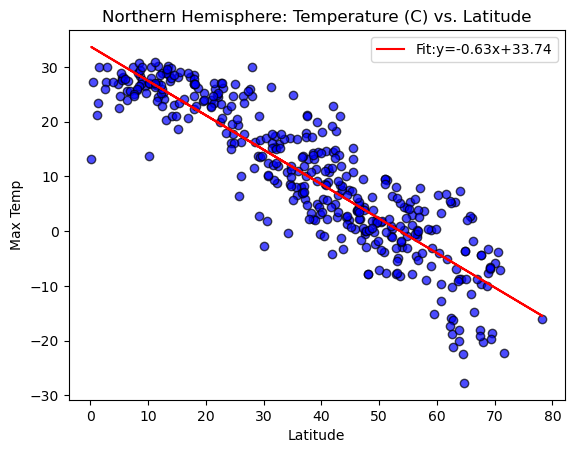

The r^2 value is -0.8950196903576908


In [61]:

# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    'Northern Hemisphere: Temperature (C) vs. Latitude',
    'Latitude',
    'Max Temp',
    "nhemi_latvtemp"
    )


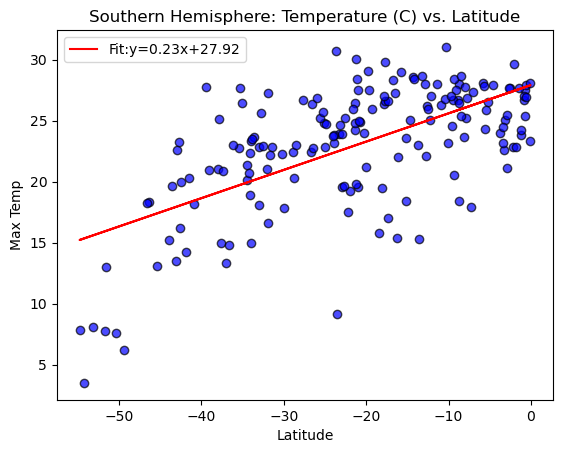

The r^2 value is 0.6295572162405446


In [62]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    'Southern Hemisphere: Temperature (C) vs. Latitude',
    'Latitude',
    'Max Temp',
    "shemi_latvtemp"
    )

**Discussion about the linear relationship:** As expected the northern hemisphere shows a clear connection with colder tempertures the higher the latitude as it is farthest from the equator. The northern Hemisphere has more mountain ranges which impacts tempertures more than any other land structure. The southern hemisphere shows higher temperatures closer to the equator or 0 latitude. 

### Humidity vs. Latitude Linear Regression Plot

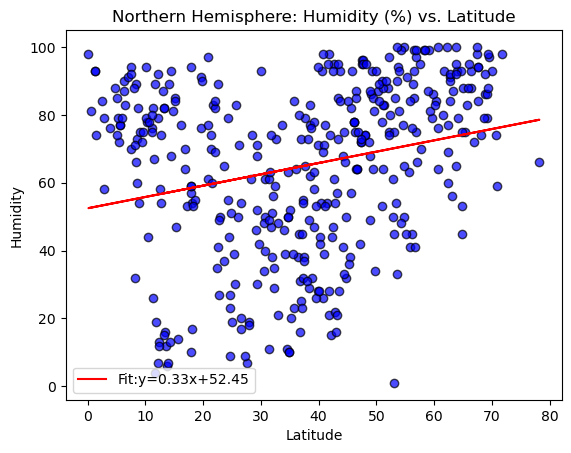

The r^2 value is 0.2477414158205569


In [69]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Northern Hemisphere: Humidity (%) vs. Latitude',
    'Latitude',
    'Humidity',
    "nhemi_humid",
    )

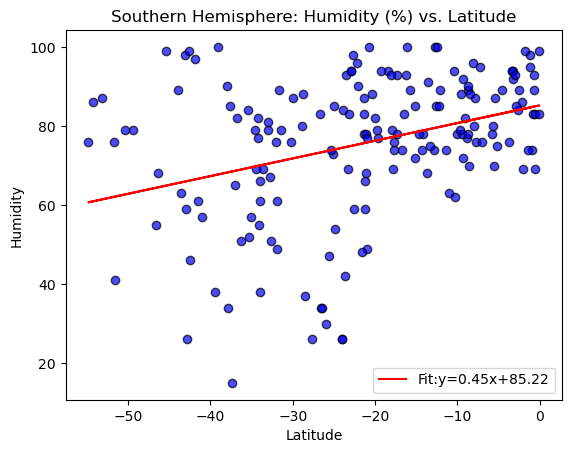

The r^2 value is 0.3459407294005387


In [70]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Southern Hemisphere: Humidity (%) vs. Latitude',
    'Latitude',
    'Humidity',
    "shemi_humid",
    )

**Discussion about the linear relationship:** There is less correlations to make about humidity compared to tempuratures. Both hemispheres have comparable bodies of water that would increase humidities. There is a slight connection between the equator and humiditiy. Most of the equator is water masses, any land masses that are surrounded by water which would increase the humidity. Any relationship is very minor and is likly highly situational to their respective areas in regards to water and sun levels. 

### Cloudiness vs. Latitude Linear Regression Plot

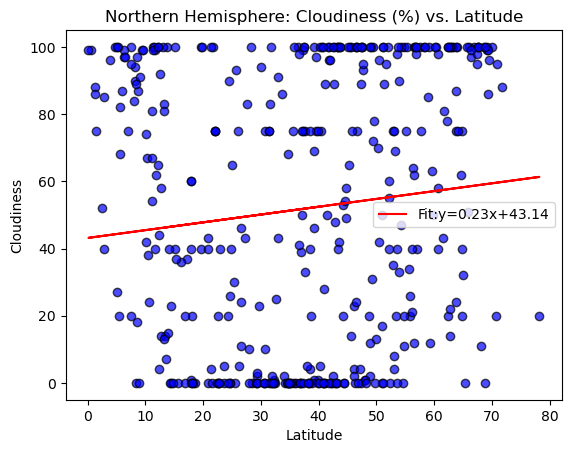

The r^2 value is 0.10838546517876692


In [71]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Northern Hemisphere: Cloudiness (%) vs. Latitude',
    'Latitude',
    'Cloudiness',
    "nhemi_cloud",
    )

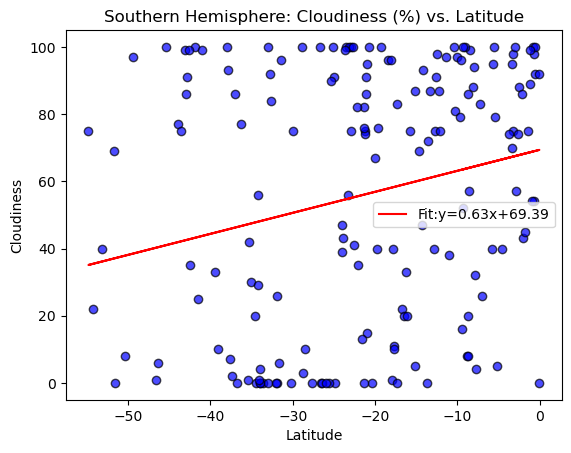

The r^2 value is 0.23212046996047267


In [72]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Southern Hemisphere: Cloudiness (%) vs. Latitude',
    'Latitude',
    'Cloudiness',
    "shemi_cloud",
    )

**Discussion about the linear relationship:** There is a fair amount of distrubtion between both hemisphere when considering cloudiness. The northern hemisphere is more dense and suggests more climatic diversity in it's regions as we have instances of 0% clouds and 100% clouds between 10 and 70 latitudes. The southern hemisphere shows more cloudiness towards the equator than further away.

### Wind Speed vs. Latitude Linear Regression Plot

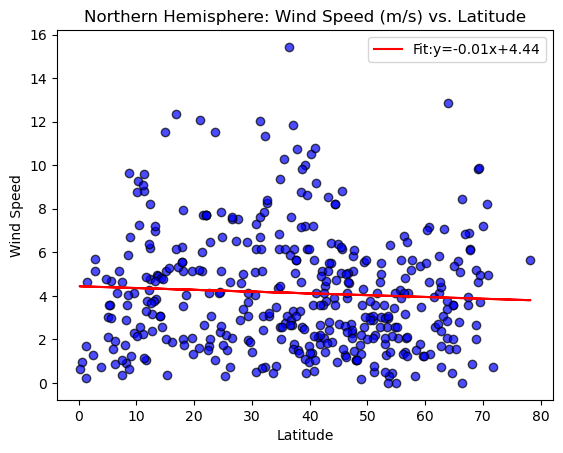

The r^2 value is -0.05687334253690367


In [73]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Northern Hemisphere: Wind Speed (m/s) vs. Latitude',
    'Latitude',
    'Wind Speed',
    "nhemi_wind",
    )

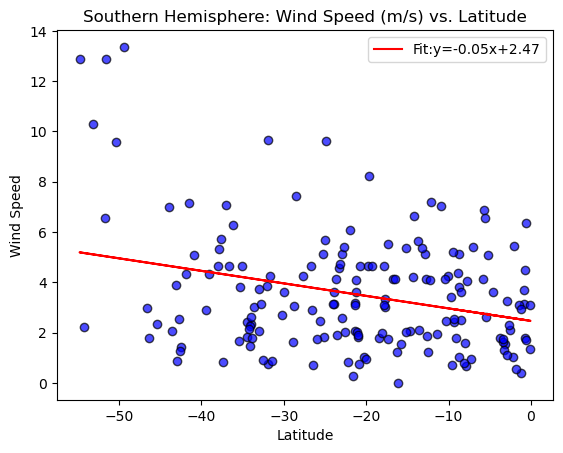

The r^2 value is -0.29309731052744215


In [74]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Southern Hemisphere: Wind Speed (m/s) vs. Latitude',
    'Latitude',
    'Wind Speed',
    "shemi_wind",
    )

**Discussion about the linear relationship:** There seems to be a closer relationship between lower windspeeds of 6 mph and lower near the equator within both hemispheres. While the distribution is more dense in the Northern Hemisphere, the trends seems to have a few outliers. When reviewing we should keep in mind the sources of these wind speeds. Wind can be caused by nature and by man, tornados and huricanes are associated with high wind speeds. Largely there seems to be more wind events in the northern hemisphere of varies degrees, the larger land mass as a whole, man-made structures (Ex. Chicago "The Windy City"), natural weather events, and the different biome types within this region could be a cause of this. 